<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Project2/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
# Import the font_manager module from matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt


# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


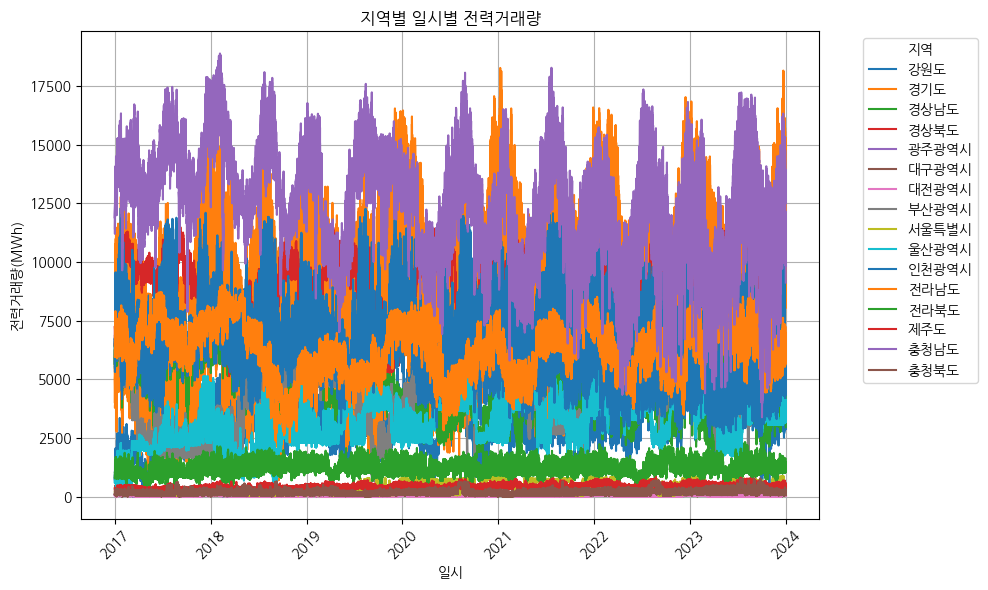

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/환경프로젝트/분석을 위한 데이터 전처리(전력량을 범주형으로)/all_data.csv')
df['일시'] = pd.to_datetime(df['일시'])

df['전력거래량(MWh)'] = pd.to_numeric(df['전력거래량(MWh)'], errors='coerce')

df = df.dropna(subset=['전력거래량(MWh)', '지역'])

grouped = df.groupby('지역')

plt.figure(figsize=(10, 6))
for 지역, group in grouped:
    plt.plot(group['일시'], group['전력거래량(MWh)'], label=지역)

plt.xlabel('일시')
plt.ylabel('전력거래량(MWh)')
plt.title('지역별 일시별 전력거래량')
plt.legend(title='지역', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 데이터 로드
data = pd.read_csv('/content/drive/MyDrive/환경프로젝트/분석을 위한 데이터 전처리(전력량을 범주형으로)/all_data(범주형_시간추가).csv')

data.head()


,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),...,20cm 지중온도(°C),30cm 지중온도(°C),지역,전력거래량(MWh),전력거래량_범주,년도,월,일,요일,시간
0,2017-01-01 10:00:00,-1.08,NaN,0.56,60.0,91.0,5.20,-2.34,1023.82,1031.46,...,NaN,NaN,경기도,3845.0,낮음,2017,1,1,6,10
1,2017-01-01 11:00:00,0.74,NaN,0.84,156.0,84.6,5.46,-1.58,1023.52,1031.14,...,NaN,NaN,경기도,3793.0,낮음,2017,1,1,6,11
2,2017-01-01 12:00:00,2.76,NaN,0.94,202.0,77.0,5.76,-0.90,1022.42,1029.96,...,NaN,NaN,경기도,3804.0,낮음,2017,1,1,6,12
3,2017-01-01 13:00:00,4.42,NaN,1.04,218.0,71.2,5.98,-0.34,1021.50,1028.96,...,NaN,NaN,경기도,3780.0,낮음,2017,1,1,6,13
4,2017-01-01 14:00:00,5.52,NaN,1.02,210.0,68.4,6.18,0.10,1020.66,1028.10,...,NaN,NaN,경기도,3788.0,낮음,2017,1,1,6,14


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978816 entries, 0 to 978815
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   일시             978816 non-null  object 
 1   기온(°C)         978801 non-null  float64
 2   강수량(mm)        154363 non-null  float64
 3   풍속(m/s)        978594 non-null  float64
 4   풍향(16방위)       978594 non-null  float64
 5   습도(%)          978796 non-null  float64
 6   증기압(hPa)       978800 non-null  float64
 7   이슬점온도(°C)      978799 non-null  float64
 8   현지기압(hPa)      978758 non-null  float64
 9   해면기압(hPa)      978761 non-null  float64
 10  일조(hr)         537418 non-null  float64
 11  일사(MJ/m2)      507694 non-null  float64
 12  적설(cm)         46039 non-null   float64
 13  3시간신적설(cm)     4564 non-null    float64
 14  전운량(10분위)      931584 non-null  float64
 15  중하층운량(10분위)    977026 non-null  float64
 16  최저운고(100m )    640279 non-null  float64
 17  시정(10m)        978788 non-nul

In [ ]:
data = data.fillna(0)

data.head()

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),...,20cm 지중온도(°C),30cm 지중온도(°C),지역,전력거래량(MWh),전력거래량_범주,년도,월,일,요일,시간
0,2017-01-01 10:00:00,-1.08,0.0,0.56,60.0,91.0,5.20,-2.34,1023.82,1031.46,...,0.0,0.0,경기도,3845.0,낮음,2017,1,1,6,10
1,2017-01-01 11:00:00,0.74,0.0,0.84,156.0,84.6,5.46,-1.58,1023.52,1031.14,...,0.0,0.0,경기도,3793.0,낮음,2017,1,1,6,11
2,2017-01-01 12:00:00,2.76,0.0,0.94,202.0,77.0,5.76,-0.90,1022.42,1029.96,...,0.0,0.0,경기도,3804.0,낮음,2017,1,1,6,12
3,2017-01-01 13:00:00,4.42,0.0,1.04,218.0,71.2,5.98,-0.34,1021.50,1028.96,...,0.0,0.0,경기도,3780.0,낮음,2017,1,1,6,13
4,2017-01-01 14:00:00,5.52,0.0,1.02,210.0,68.4,6.18,0.10,1020.66,1028.10,...,0.0,0.0,경기도,3788.0,낮음,2017,1,1,6,14


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['전력거래량_범주'] = data['전력거래량_범주'].astype(str)

data['지역_숫자'] = label_encoder.fit_transform(data['지역'])
data['전력거래량_범주_숫자'] = label_encoder.fit_transform(data['전력거래량_범주'])
data = data.drop(['전력거래량_범주', '지역'], axis=1)
data.head()

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),...,20cm 지중온도(°C),30cm 지중온도(°C),전력거래량(MWh),년도,월,일,요일,시간,지역_숫자,전력거래량_범주_숫자
0,2017-01-01 10:00:00,-1.08,0.0,0.56,60.0,91.0,5.20,-2.34,1023.82,1031.46,...,0.0,0.0,3845.0,2017,1,1,6,10,1,1
1,2017-01-01 11:00:00,0.74,0.0,0.84,156.0,84.6,5.46,-1.58,1023.52,1031.14,...,0.0,0.0,3793.0,2017,1,1,6,11,1,1
2,2017-01-01 12:00:00,2.76,0.0,0.94,202.0,77.0,5.76,-0.90,1022.42,1029.96,...,0.0,0.0,3804.0,2017,1,1,6,12,1,1
3,2017-01-01 13:00:00,4.42,0.0,1.04,218.0,71.2,5.98,-0.34,1021.50,1028.96,...,0.0,0.0,3780.0,2017,1,1,6,13,1,1
4,2017-01-01 14:00:00,5.52,0.0,1.02,210.0,68.4,6.18,0.10,1020.66,1028.10,...,0.0,0.0,3788.0,2017,1,1,6,14,1,1


In [ ]:
X = data.drop(['전력거래량_범주_숫자', '일시'], axis=1)
y = data['전력거래량_범주_숫자']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


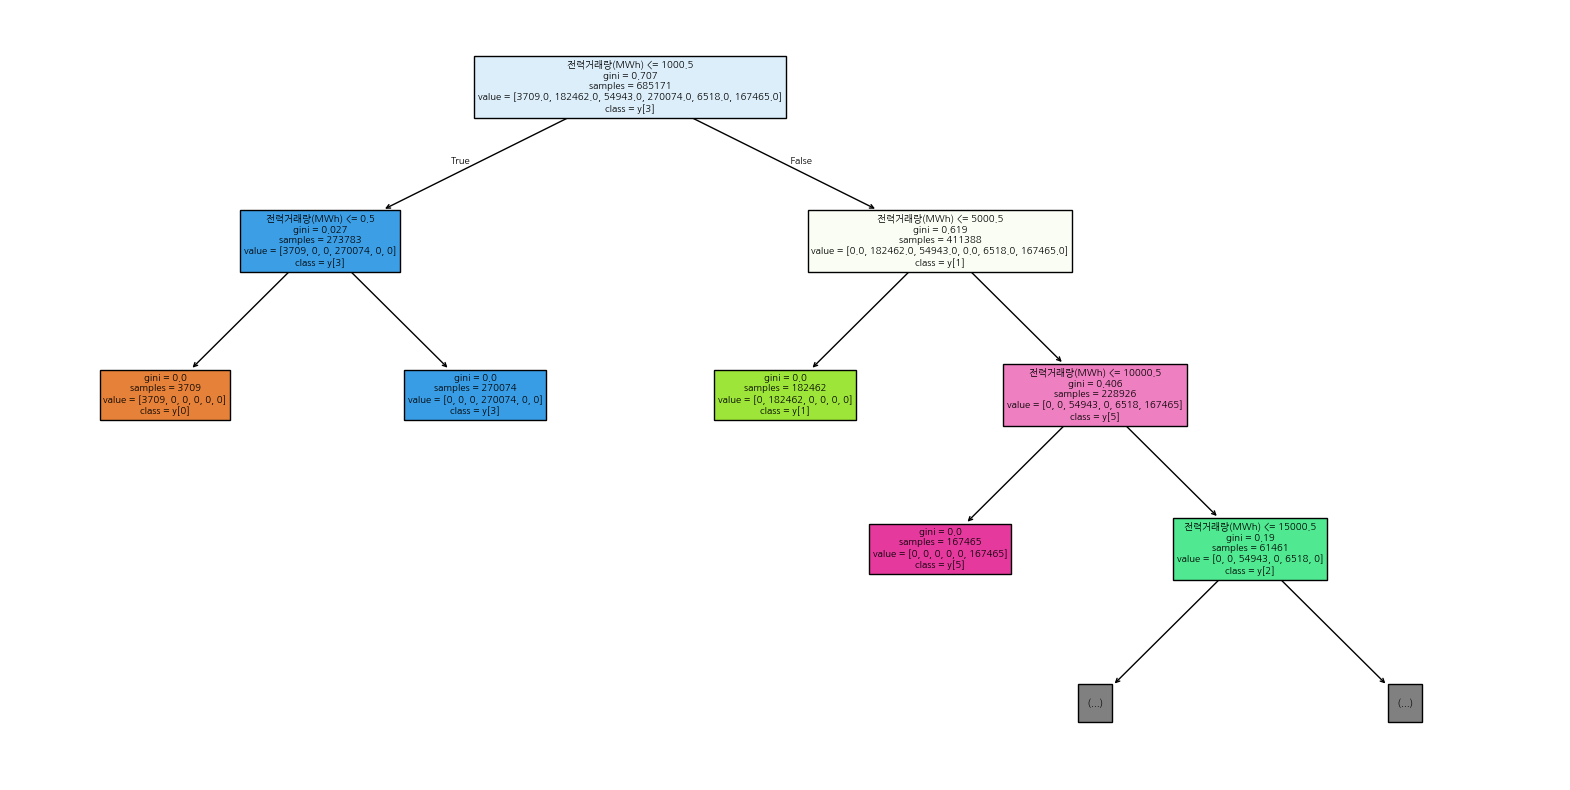

Top 5 important nodes:
Feature: 전력거래량(MWh), Importance: 1.0
Feature: 지역_숫자, Importance: 0.0
Feature: 전운량(10분위), Importance: 0.0
Feature: 강수량(mm), Importance: 0.0
Feature: 풍속(m/s), Importance: 0.0


In [ ]:
from sklearn.tree import plot_tree
import numpy as np

feature_importances = clf.feature_importances_


indices = np.argsort(feature_importances)[-5:][::-1]


plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=True, max_depth=3)
plt.show()


print("Top 5 important nodes:")
for i in indices:
    print(f"Feature: {X.columns[i]}, Importance: {feature_importances[i]}")

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))